In [1]:
#! /usr/bin/env python3

#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor
from collections import Counter

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import tables
import time
from scipy import stats

import pdb

ModuleNotFoundError: No module named 'tables'

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 1.505e+03, 1.119e+03, 3.520e+02, 2.210e+02,
        2.160e+02, 1.830e+02, 1.480e+02]),
 array([0.43734482, 0.46173691, 0.486129  , 0.5105211 , 0.53491319,
        0.55930528, 0.58369737, 0.60808947, 0.63248156, 0.65687365,
        0.68126574, 0.70565784, 0.73004993, 0.75444202, 0.77883411,
        0.80322621, 0.8276183 , 0.85201039, 0.87640248, 0.90079458,
        0.92518667, 0.94957876]),
 <a list of 21 Patch objects>)

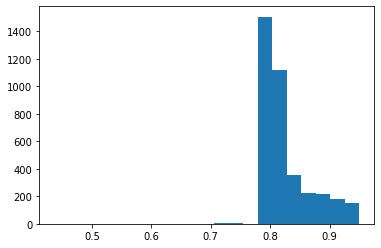

In [3]:
pred = np.loadtxt('pred.txt')
plt.hist(pred, bins =21)

Average lddt:
0.7223256797956673


(array([5.000e+00, 7.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 3.000e+01,
        5.900e+01, 1.700e+02, 4.720e+02, 9.090e+02, 1.734e+03, 2.834e+03,
        4.137e+03, 5.184e+03, 5.459e+03, 5.386e+03, 4.702e+03, 3.283e+03,
        2.076e+03, 7.340e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

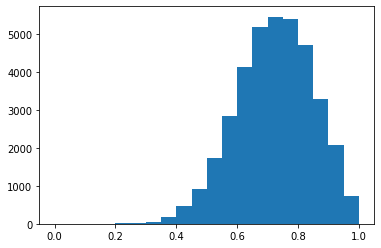

In [17]:
#Read df
complete_df = pd.read_csv('/home/patrick/complete_df.csv')
print('Average lddt:' )
print(sum(complete_df['global_lddt'])/len(complete_df))
plt.hist(complete_df['global_lddt'], bins = 20)

In [16]:
av = 0.7223256797956673
sum_dev = 0
global_lddt = [*complete_df['global_lddt']]
for i in range(0,len(global_lddt)):
    dev = np.absolute(global_lddt[i]-av)
    sum_dev+=dev
sum_dev/len(global_lddt)

0.10180077011659185

Average predicted lddt:  0.7187992837540107


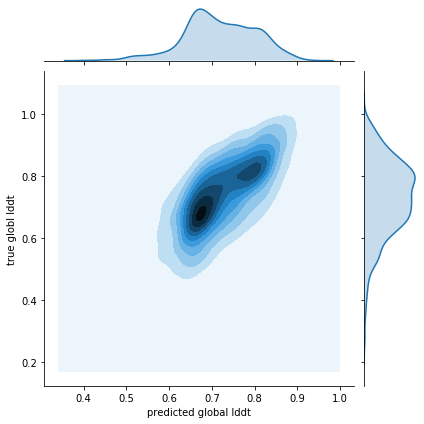

In [21]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['predicted global lddt', 'true globl lddt']
true = []
pred = []
for i in range(0,len(df)):
    pred.append(literal_eval(df['predicted global lddt'][i])[0])
    true.append(df['true globl lddt'][i])
df['true globl lddt'] = true
df['predicted global lddt'] = pred
g = sns.jointplot(x='predicted global lddt', y = 'true globl lddt', data = df, kind = 'kde')
print('Average predicted lddt: ', np.average(pred) )

Average error 0.07116998182887702


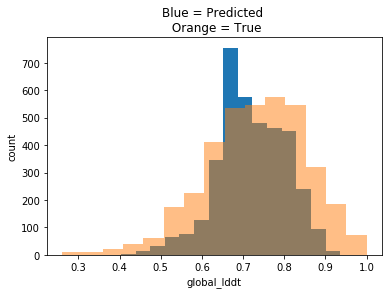

In [19]:
plt.hist(df['pred'], bins = 15)
plt.hist(df['true'], bins = 15, alpha = 0.5)
plt.xlabel('global_lddt')
plt.ylabel('count')
plt.title('Blue = Predicted \n Orange = True')
print('Average error',np.average(np.absolute(df['true']-df['pred'])))

In [16]:
np.average(np.absolute(df['true']-df['pred']))

0.07116998182887702

Average error 0.10782688635402905


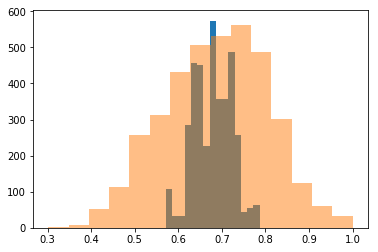

In [4]:
plt.hist(df['pred'], bins = 15)
plt.hist(df['true'], bins = 15, alpha = 0.5)
print('Average error',np.average(np.absolute(df['true']-df['pred'])))

In [3]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['pred', 'true']
classes =['below','on','above']
y_true = np.asarray([*df['true']])
y_pred = np.asarray([*df['pred']])
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title='Confusion matrix',
        ylabel='True label',
        xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

np.set_printoptions(precision=2)
plt.show()

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [25]:
df = pd.read_csv('lr_plot.tsv', sep = '\t')
df.columns = ['lr', 'loss']

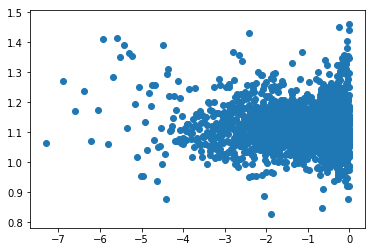

In [40]:
log_x = np.log(df['lr'])
y = df['loss']
df =  pd.DataFrame(list(zip(log_x,y)), columns = ['lr', 'loss'])
plt.scatter(log_x,y)